# Twitter Sentiment Analysis using Word2Vec and Logistic Regression and Visualizing using t-SNE and PCA
This notebook demonstrates a complete pipeline for performing sentiment analysis on tweets using:
- **Preprocessing & Tokenization**
- **Word2Vec Embeddings**
- **Logistic Regression Classifier**
- **Visualizing using t-SNE and PCA**

In [27]:
#Impoting Libraries
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Download necessary NLTK tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Function Definations

In [28]:
#Tokenzation of tweet
def preprocess_and_tokenize(df):
    df['tokenized'] = df['tweet'].apply(lambda x: word_tokenize(str(x).lower()))
    return df

#Training of the model
def train_word2vec(tokenized_corpus, vector_size=100, window=5, min_count=1, sg=1, epochs=20):
    return Word2Vec(sentences=tokenized_corpus, vector_size=vector_size, window=window,
                    min_count=min_count, sg=sg, epochs=epochs)

#Getting average vector for a single tweet embeddings
def get_average_vector(tokens, model, k=100):
    vec = np.zeros(k)
    count = 0
    for word in tokens:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    return vec / count if count > 0 else vec

#To get the average vector
def vectorize_tweets(tokenized_tweets, model, k=100):
    return np.array([get_average_vector(tokens, model, k) for tokens in tokenized_tweets])

# Load and Process Training Data

In [29]:
df = pd.read_csv("twitter_sentiment.csv")
df = preprocess_and_tokenize(df)

## Train Word2Vec and Extract Features

In [30]:
# Train Word2Vec model
w2v_model = train_word2vec(df['tokenized'].tolist(), vector_size=100)

# Convert tweets to vectors
X = vectorize_tweets(df['tokenized'], w2v_model)
y = df['sentiment']

## Train Logistic Regression and Evaluate

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Evaluation on Training Dataset")
print(classification_report(y_test, y_pred))

Evaluation on Training Dataset
              precision    recall  f1-score   support

         0.0       0.66      0.74      0.70      4492
         1.0       0.61      0.51      0.55      3678
         2.0       0.64      0.65      0.64      4169

    accuracy                           0.64     12339
   macro avg       0.64      0.63      0.63     12339
weighted avg       0.64      0.64      0.64     12339



# Visualizaing Corpus with t-SNE and PCA

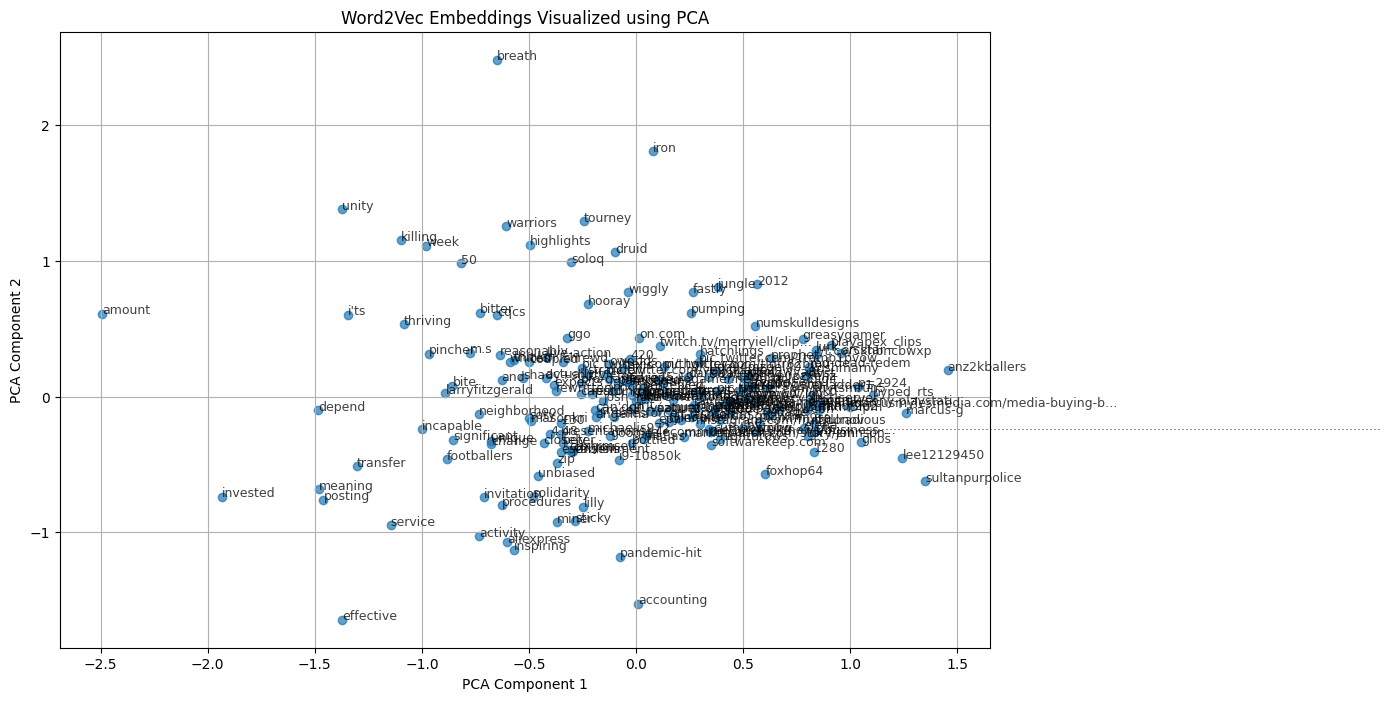

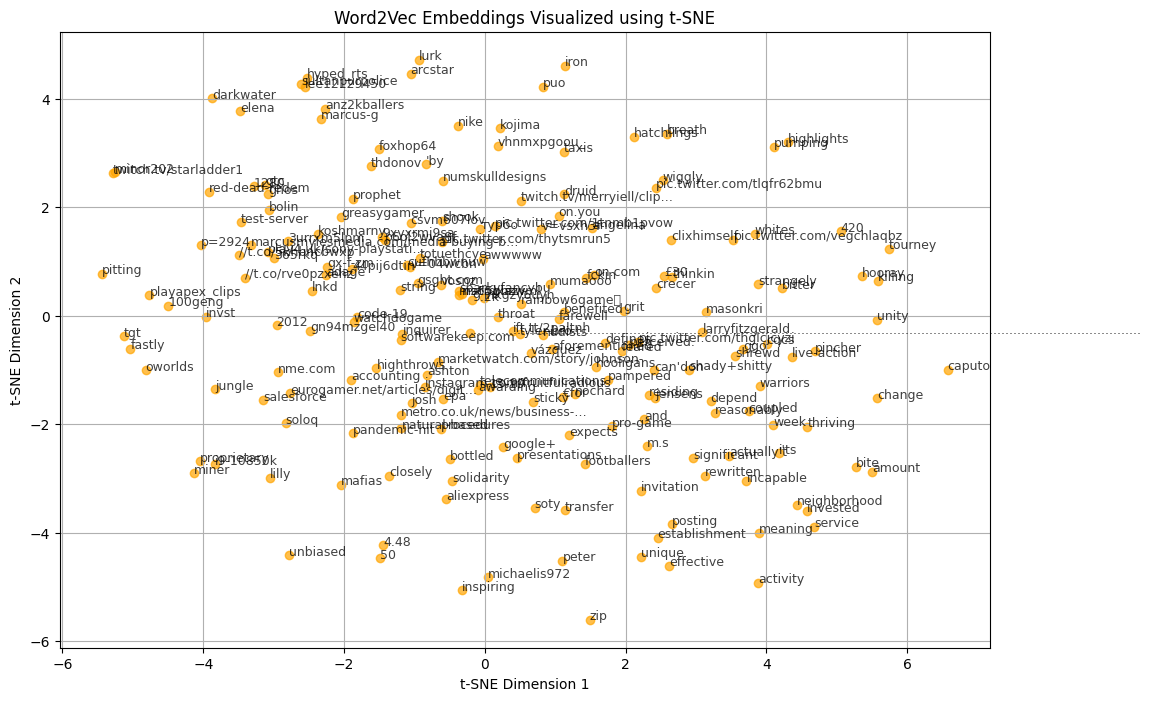

In [32]:
# Visualizing Word2Vec Embeddings using PCA and t-SNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import random

# Select a sample of words to visualize
words = list(w2v_model.wv.key_to_index.keys())
sample_words = random.sample(words, 200)  # Visualizing 200 words

# Get their vectors
word_vectors = np.array([w2v_model.wv[word] for word in sample_words])

# -------- PCA Visualization --------
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
for i, word in enumerate(sample_words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize=9, alpha=0.75)
plt.title("Word2Vec Embeddings Visualized using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# -------- t-SNE Visualization --------
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(word_vectors)

plt.figure(figsize=(12, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.7, c='orange')
for i, word in enumerate(sample_words):
    plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]), fontsize=9, alpha=0.75)
plt.title("Word2Vec Embeddings Visualized using t-SNE")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()
